In [33]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt
import scipy.sparse as sps
import scipy.optimize as sco

# Polynome de degré 2

In [34]:
def f(x):
    return 0.1*x**2 + np.cos(x/2)-np.exp(-x/4) + 2.1

def g(x):
    return x**2 + 0.1

def h(x):
    return np.cos(x) + 2

fonctions_test = [f,g,h]

In [35]:
def a(x,f) :
    return np.sqrt(f(0)) * (1-x) - np.sqrt(f(1)) * x

def p2(x,a1,sqrtb0):
    return a1**2 + x*(1-x)*sqrtb0
    
def approx_p2(x,f):
    xstar = np.sqrt(f(0))/ (np.sqrt(f(0)) + np.sqrt(f(1)))
    interp = np.array([0,1,xstar])
    
    a1 = a(x,f)
    sqrtb0 =  f(xstar) / (xstar *(1-xstar) )  
    return p2(x,a1,sqrtb0), interp


In [36]:
def test_approx2(f):
    x = np.linspace(0,1,101)
    px, interp = approx_p2(x,f)
    fx = f(x)
    plt.plot(x,fx,label='f(x)')
    plt.plot(x,px,label='p2(x)')
    plt.plot(interp, f(interp),'ob')
    plt.legend()
    name = str(f).split(' ')
    plt.title("Interpolation de la fonction "+name[1])
    plt.show()
    return px,fx

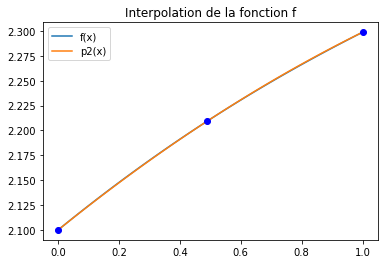

Norme 2 de l'erruer :  0.0025893052561467376
Norme inf de l'erreur :  0.0004046236121508784


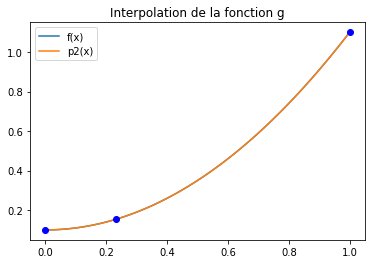

Norme 2 de l'erruer :  9.4623719602731e-16
Norme inf de l'erreur :  3.3306690738754696e-16


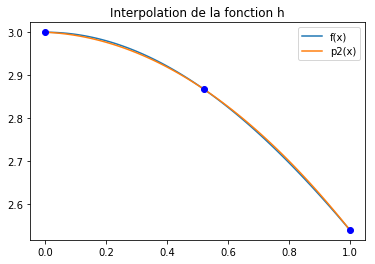

Norme 2 de l'erruer :  0.027257190435299193
Norme inf de l'erreur :  0.004026454146748293


In [37]:
for fonctions in fonctions_test : 
    px,fx = test_approx2(fonctions)
    print("Norme 2 de l'erruer : ",npl.norm(fx-px))
    print("Norme inf de l'erreur : ",npl.norm(fx-px,np.inf))

# Polynome de degré 3

In [38]:
def f(x):
    return 2*x**3 + x**2 + 2 

def g(x):
    return x**2 + 0.1

def h(x):
    return np.cos(x)

def k(x):
    return 3*x**4 + 2*x**3 + x**2 + 2 

fonctions_test = [f,g,h,k]

In [39]:
def phi(beta,f) : 
    return beta * np.sqrt((1-beta)*f(0)) / (np.sqrt((1-beta)*f(0)) + np.sqrt(f(beta))) 

def psi(alpha,f):
    return  (alpha * np.sqrt(alpha*f(1)) + np.sqrt(f(alpha)) ) / (np.sqrt(alpha*f(1)) + np.sqrt(f(alpha)))

def K(alpha, beta,f):
    phi_beta = phi(beta,f)
    psi_alpha = psi(alpha,f)
    return np.array([phi_beta, psi_alpha])

def T(alpha,f):
    return alpha - phi(psi(alpha,f),f)

In [40]:
def p3(x,a1,b1):
    return x * a1**2 + (1-x)* b1**2

def approx_p3(x,f):
    alpha = sco.newton(T,1/4,args=(f,))
    beta = psi(alpha,f)
    interp = np.array([0,1,alpha,beta])
    
    a1 = np.sqrt(f(1))* (x- alpha)/(1-alpha) - np.sqrt(f(alpha)/alpha) * (1-x)/(1-alpha)
    b1 = np.sqrt(f(beta)/(1-beta)) * x/beta - np.sqrt(f(0)) * (beta-x)/(beta)
    return p3(x,a1,b1), interp

In [41]:
def test_approx3(f):
    x = np.linspace(0,1,101)
    px, interp = approx_p3(x,f)
    fx = f(x)
    plt.plot(x,fx,label='f(x)')
    plt.plot(x,px,label='p3(x)')
    plt.plot(interp, f(interp),'ob')
    plt.legend()
    name = str(f).split(' ')
    plt.title("Interpolation de la fonction "+name[1])
    plt.show()
    return px,fx

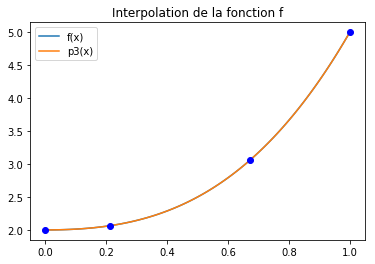

Norme 2 de l'erruer :  5.599751867943366e-15
Norme inf de l'erreur :  1.3322676295501878e-15


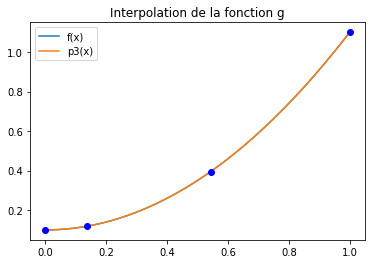

Norme 2 de l'erruer :  1.0753270844771355e-15
Norme inf de l'erreur :  4.440892098500626e-16


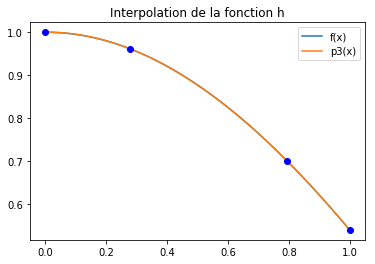

Norme 2 de l'erruer :  0.003458906263776177
Norme inf de l'erreur :  0.0005932715837815294


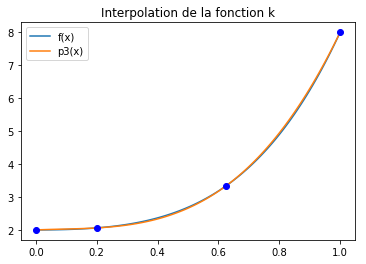

Norme 2 de l'erruer :  0.2888576255722688
Norme inf de l'erreur :  0.055868465529055555


In [42]:
for fonctions in fonctions_test : 
    px,fx = test_approx3(fonctions)
    print("Norme 2 de l'erruer : ",npl.norm(fx-px))
    print("Norme inf de l'erreur : ",npl.norm(fx-px,np.inf))

# Polynome de degré 3 avec $h$

In [43]:
def f(x,h):
    x = x*h
    return 2*x**3 + x**2 + 2 

def g(x,h):
    x = x*h
    return x**3 + 0.1

def h(x,h):
    x = x*h
    return np.cos(x)

fonctions_test = [f,g,h]

In [44]:
def phih(beta,f,h) : 
    return beta * np.sqrt((1-beta)*f(0,h)) / (np.sqrt((1-beta)*f(0,h)) + np.sqrt(f(beta,h))) 

def psih(alpha,f,h):
    return  (alpha * np.sqrt(alpha*f(1,h)) + np.sqrt(f(alpha,h)) ) / (np.sqrt(alpha*f(1,h)) + np.sqrt(f(alpha,h)))

def Kh(alpha, beta,f,h):
    phi_beta = phih(beta,f,h)
    psi_alpha = psih(alpha,f,h)
    return np.array([phi_beta, psi_alpha])

def Th(alpha,f,h):
    return alpha - phih(psih(alpha,f,h),f,h)

In [45]:
def p3h(x,a1,b1,h):
    return x * a1**2 + (1-x)* b1**2

def approx_p3h(x,f,h):
    alpha = sco.newton(Th,1/4,args=(f,h,))
    beta = psih(alpha,f,h)
    interp = np.array([0,1,alpha,beta]) 
    
    a1 = np.sqrt(f(1,h)) * (x - alpha)/(1-alpha) - np.sqrt(f(alpha,h)/alpha) * (1-x)/(1-alpha)
    b1 = np.sqrt(f(beta,h)/(1-beta)) * x/beta - np.sqrt(f(0,h)) * (beta-x)/(beta)
    return p3h(x,a1,b1,h), interp

In [46]:
def test_approx3h(f,h):
    x = np.linspace(0,1,101)
    px, interp = approx_p3h(x,f,h)
    fx = f(x,h)
    plt.plot(x,fx,label='f(x)')
    plt.plot(x,px,label='p(x)')
    plt.plot(interp, f(interp,h),'ob')
    plt.legend()
    name = str(f).split(' ')
    plt.title("Interpolation de la fonction "+name[1])
    plt.show()
    return px,fx

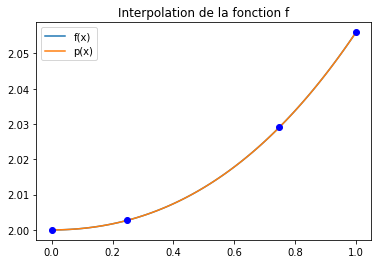

Norme 2 de l'erruer :  5.004631229248277e-15
Norme inf de l'erreur :  8.881784197001252e-16


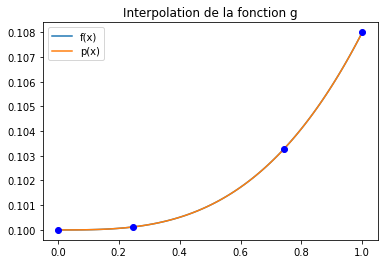

Norme 2 de l'erruer :  2.5514002453611344e-16
Norme inf de l'erreur :  6.938893903907228e-17


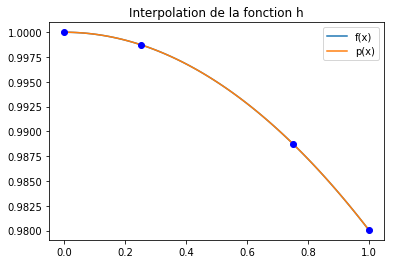

Norme 2 de l'erruer :  5.963123334928927e-06
Norme inf de l'erreur :  1.03858948985458e-06


In [47]:
h = 0.2
for fonctions in fonctions_test : 
    px,fx = test_approx3h(fonctions,h)
    print("Norme 2 de l'erruer : ",npl.norm(fx-px))
    print("Norme inf de l'erreur : ",npl.norm(fx-px,np.inf))

# Polynome de degré $n = 2p + 1$ 

## Operateur S

In [48]:
def S (p,eps,X0):
    # séparation en alpha et beta
    alpha = X0[:p]
    beta = X0[p:]

    # creation des delta pour alpha et beta
    delta_alpha = np.concatenate((alpha,[1]))
    delta_alpha[1:] -= alpha
    
    delta_beta = - np.concatenate(([0],beta))
    delta_beta[:-1] += beta
    delta_beta[-1] += 1 
    
    # creation des delta_tilde pour alpha et beta
    delta_alpha_t = np.zeros(p+1)
    delta_beta_t = np.zeros(p+1)
    for i in range (p+1):
        delta_alpha_t[i] = max(delta_alpha[i],2*eps)
        delta_beta_t[i] = max(delta_beta[i],2*eps)

    delta_alpha_t = delta_alpha_t / np.sum(delta_alpha_t)
    delta_beta_t = delta_beta_t / np.sum(delta_beta_t)

    # mise a jour des alpha et beta, directement dans x
    X = np.zeros(2*p)
    X[0] = delta_alpha_t[1]
    X[p] = delta_beta_t[0]
    for i in range (1,p):
        X[i] = X[i-1] + delta_alpha_t[i+1]
        X[i+p] = X[i-1+p] + delta_beta_t[i]
    
    return X

In [49]:
def test_S(a):
    print(a)
    Speps = S(4,0.1,a)
    print(Speps)

    plt.plot(Speps[:4],np.ones(4),'or')
    plt.plot(Speps[4:],np.ones(4),'ob')

[0.1, 0.35, 0.5, 0.8, 0.07, 0.39, 0.65, 0.85]
[0.2173913  0.39130435 0.65217391 0.82608696 0.16949153 0.44067797
 0.66101695 0.83050847]


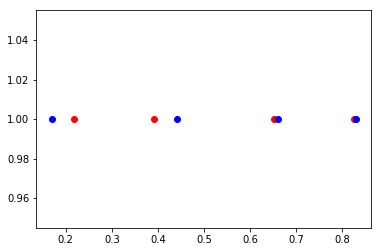

In [50]:
a = [0.1,0.35,0.5,0.8,0.07,0.39,0.65,0.85]
test_S(a)

# Initialisation

In [51]:
def init_X(p):
    i = np.linspace(0,p,p+1)
    X = np.zeros(2*(p+1))
    X[:p+1] = 1/2*(1-np.cos((2*i+1)*np.pi/(2*p+1)))
    X[p+1:] = 1/2*(1-np.cos(2*i*np.pi/(2*p+1)))
    return X

In [52]:
def test_init(p):
    X = init_X(p)
    plt.plot(X[:p+1],np.ones(len(X[:p+1])),'ob')
    plt.plot(X[p+1:],np.ones(len(X[p+1:])),'or')

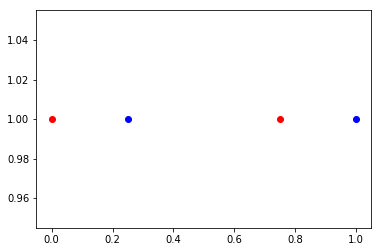

In [53]:
p = 1
test_init(p)

# Algorithme

In [54]:
def f(x,h):
    x = x*h
    return 2*x**3 + x**2 + 2 

def g(x,h):
    x = x*h
    return x**3 + 2

def h(x,h):
    x = x*h
    return np.cos(x)

fonctions_test = [f,g,h]

In [55]:
def Jp(p,f,h,X,epsilon):
    i = np.linspace(0,p-1,p)
    theta_i = 2*(p-i)*np.pi/(2*p+1)
    D_alpha = 2*p*np.cos(p*theta_i)/(np.cos(theta_i)-1) + np.sin(p*theta_i)/np.sin(theta_i) * 2 * (p - 1/(np.cos(theta_i)-1))
    
    i = np.linspace(1,p,p)
    eta_i = (2*(p-i)+1)*np.pi/(2*p+1)
    D_beta = 2*p*np.cos(p*eta_i)/(np.cos(eta_i)+1) + np.sin(p*eta_i)/np.sin(eta_i) * 2* (p + 1/(np.cos(eta_i)+1))

    feps = max( np.max(f(X,h)),epsilon)
    return  np.sqrt(feps) * sps.diags(np.concatenate((D_alpha,D_beta))).toarray()

def b_beta (p,f,h,beta,x,epsilon):
    res = 0
    for i in range (p+1):
        somme = (-1)**(i+p)*np.sqrt(max(f(beta[i],h),epsilon)/(1-beta[i])) 
        pro = 1
        for j in range (p+1):
            if i != j :
                pro *=  (x - beta[j])/(beta[i]-beta[j])
        somme *= pro
        res  += somme
    return res
  

def a_alpha (p,f,h,alpha,x,epsilon):
    res = 0
    for i in range (p+1):
        somme = (-1)**(i+p)*np.sqrt(max(f(alpha[i],h),epsilon)/(alpha[i])) 
        pro = 1
        for j in range (p+1):
            if i != j :
                pro *=  (x - alpha[j])/(alpha[i]-alpha[j])
        somme *= pro
        res += somme
    return res
     
def f_theta(X,p,f,h,espilon):
    alpha = X[:p]
    alpha_1 = np.concatenate((alpha,[1]))
    beta = X[p:]
    beta_0 = np.concatenate(([0],beta))
    return np.concatenate(( b_beta(p,f,h,beta_0,alpha,epsilon), a_alpha(p,f,h,alpha_1,beta,epsilon) ))

In [56]:
def Newton_Raphson (p,f,h,epsi,epsilon,eps=1e-12,itermax=100):
    X = init_X(p) 
    X = np.concatenate((X[:p],X[p+2:]))
    k=0
    err=2*eps
    while err > eps and itermax > k :
        X0 = np.copy(X)
        #print(f_theta(X,p,f,h,epsilon))
        d = npl.solve(Jp(p,f,h,X,epsilon),f_theta(X,p,f,h,epsilon))
        X = X - d
        #X = S(p,epsi,X)
        #print(f_theta(X,p,f,h,epsilon))
        k+=1
        err = npl.norm(X-X0)/npl.norm(X0)
    print(k)
    return X


In [94]:
def epsi_S(p):
    i = np.linspace(0,2*p+1,2*p+2)
    gamma = 1/2*(1-np.cos(i*np.pi/(2*p+1)))
    return min( 1/2/(p+1), np.min((gamma[1:]-gamma[:-1])/3))

def pn(x,ap,bp): 
    return x * ap**2 + (1-x) * bp**2
    
def approxh(x,p,f,h,epsilon):
    epsi = epsi_S(p)
    #X = sco.fsolve(f_theta,np.array([1/4,3/4]), args=(p,f,h,epsilon))
    #X = S(p,epsi,X)
    X = Newton_Raphson(p,f,h,epsi,epsilon)
    print("ftheta :",f_theta(X,p,f,h,epsilon))
    X  = np.concatenate(( X[:p],[1],[0],X[p:]))

    ap = a_alpha(p,f,h,X[:p+1],x,epsilon)
    bp = b_beta(p,f,h,X[p+1:],x,epsilon)
    
    return pn(x,ap,bp),X

In [58]:
def test_approx(p,f,h,espilon):
    x = np.linspace(0,1,101)
    px, interp = approxh(x,p,f,h,epsilon)
    #
    Ap = a_alpha(p,f,h,interp[:p+1],interp,epsilon)
    Bp = b_beta(p,f,h,interp[p+1:],interp,epsilon)
    '''
    print(Ap)
    print((-1)**p * np.sqrt(f(interp[3],h)/(1-interp[3])))
    print("Bp",Bp)
    print(pn(interp,Ap,Bp))
    '''
    #
    fx = f(x,h) 
    plt.plot(x,fx,label="f(x)")
    plt.plot(x,px,label="p(x)")
    plt.plot(interp,f(interp,h),'ob')
    plt.plot(interp, pn(interp,Ap,Bp),'or')
    plt.legend()
    name = str(f).split(' ')
    plt.title("Interpolation de la fonction "+name[1])
    plt.show()
    
    return px,fx

10
ftheta : [-2.89768209e-14  8.88178420e-16]


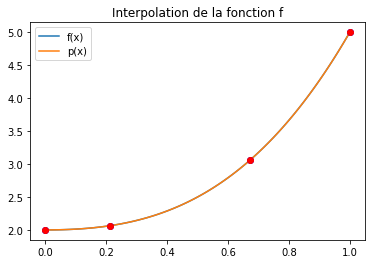

8
ftheta : [-1.69864123e-14  2.22044605e-16]


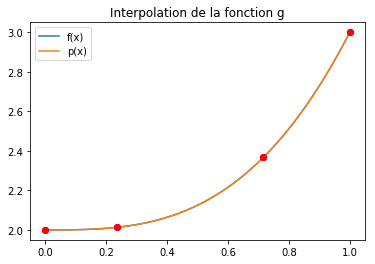

12
ftheta : [-3.56381591e-14 -1.68753900e-14]


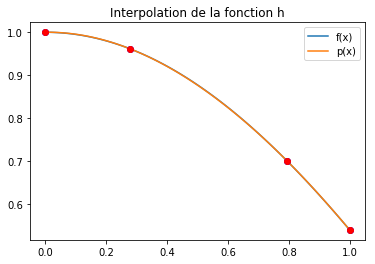

In [59]:
h = 1
p = 1
epsilon=0.001

for fonctions in fonctions_test : 
    test_approx(p,fonctions,h,epsilon)

Analyse du pb : 

Pb vient de l'opérateur S
- est ce a cause d'une erreur dans S
- ou du fait que S fait pas vraiment parti de Newton

Obj : 
- vérifier la compréhension de l'opérateur S
- vérifier exactitude du code
- vérifier comment l'intégrer

--------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [107]:
def f(x,h):
    x = x*h
    return 2*x**17 + x**10 - x**2 + 2 # - 1.85

def g(x,h):
    x = x*h
    return 0.5 + np.abs(x - 0.5) #- 0.75

def t(x,h):
    if h == 1 :
        h = 9/10
    x = x*h
    return 1/(1-x) #-1.5

def j(x,h):
    x = x*h
    return 1/ ( 1 + 25*(2*x-1)**2 ) #- 1

def k(x,h):
    x = x*h
    return 10**5 * x**10 * (1-x)**7 + 0.01

def q(x,h):
    x = x*h
    return 10 * (x-1/2)**4 #+ 0.01

fonctions_test = [f,g,t,j,k,q]

21
ftheta : [ 7.45410678e-15 -2.68118860e-14  6.85701496e-14 -1.97508676e-13
  7.25725036e-13 -2.98569502e-12  3.72502029e-12  4.63570293e-11
 -2.82420753e-11  4.68958206e-13  1.17461596e-13 -1.52614033e-13
  2.67771916e-13 -6.20489771e-13  1.80513937e-12 -4.05388223e-12
 -5.25499089e-12  6.93728408e-12 -3.84692278e-14  4.88498131e-15]


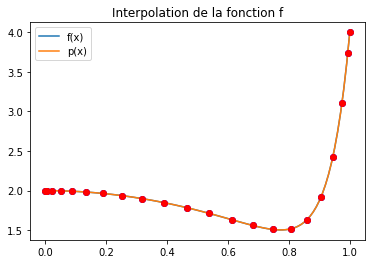

Norme de l'erreur :  n2 = 1.2043745220964846e-14  ; ninf =  2.886579864025407e-15 

16
ftheta : [ 1.54043445e-15 -6.35255737e-15  1.64659952e-14 -5.74193471e-14
  1.16807952e-12  2.79176682e-12 -2.81386026e-13  4.59632332e-14
 -3.15303339e-14  2.93098879e-14  2.66592304e-14 -2.60416688e-14
  4.32848202e-14 -2.83988111e-13  2.79121865e-12  1.16718440e-12
 -5.76899639e-14  1.66117120e-14 -6.57807142e-15  1.11022302e-15]


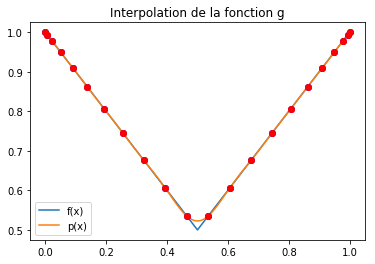

Norme de l'erreur :  n2 = 0.033035410329384014  ; ninf =  0.02253415296077166 

48
ftheta : [-4.50430925e-11  9.53494228e-11 -7.63012847e-11  3.21910415e-11
 -6.76769751e-12  5.76622083e-13 -1.47104551e-14  8.65973959e-15
  6.21724894e-15 -2.13162821e-14 -2.36639958e-10  1.27815404e-10
 -4.23823338e-11  7.52292673e-12 -5.59843838e-13  1.01585407e-14
 -3.05311332e-15 -6.10622664e-16 -7.32747196e-15 -4.88498131e-15]


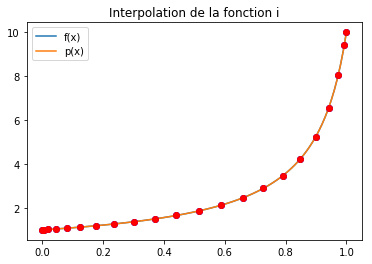

Norme de l'erreur :  n2 = 4.0050382538967663e-05  ; ninf =  1.4677039186672403e-05 

64
ftheta : [-6.82979940e-11  4.84015024e-11 -2.21841122e-12  4.08145739e-14
 -3.12250226e-14  5.00710584e-14 -8.00193245e-14  2.74669176e-13
  5.66124925e-12 -1.05872422e-10 -1.05864373e-10  5.66062822e-12
  2.75423781e-13 -8.00574884e-14  5.10633202e-14 -3.16829896e-14
  4.11823353e-14 -2.21871133e-12  4.84014981e-11 -6.82963408e-11]


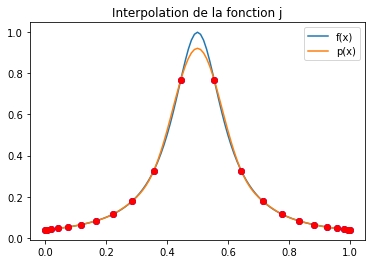

Norme de l'erreur :  n2 = 0.18763614954394178  ; ninf =  0.07821408712321365 

100
ftheta : [-4.76003278e-05  1.47173876e-04 -2.45120623e-04  1.04802702e-04
 -1.11353652e-05  9.14238555e-06 -1.09505480e-05  2.95218786e-05
  9.44833521e-05 -2.74383482e-04 -4.38278534e-04  4.25243807e-04
 -3.18420224e-04 -4.72832483e-05  1.35811992e-05 -7.84214929e-06
  5.84045108e-06 -2.29717856e-05  1.30783175e-04 -4.91306037e-05]


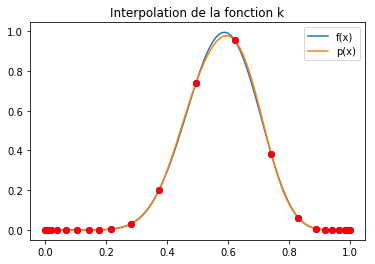

Norme de l'erreur :  n2 = 0.08506931122328919  ; ninf =  0.023683881047097066 

100
ftheta : [ 5.11918490e-08 -1.82009031e-07  4.83536966e-07 -3.59691964e-06
  3.17280800e-06  3.82882706e-05 -2.46935778e-05  4.89830576e-07
 -4.21800078e-07  3.82856812e-07  3.82856824e-07 -4.21800078e-07
  4.89830577e-07 -2.46935778e-05  3.82882706e-05  3.17280800e-06
 -3.59691964e-06  4.83536966e-07 -1.82009030e-07  5.11918493e-08]


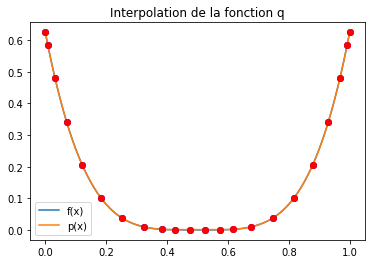

Norme de l'erreur :  n2 = 0.004757877321827654  ; ninf =  0.0010005853565683614 



In [90]:
h = 1
p = 10
epsilon=0.001

for fonctions in fonctions_test : 
    px,fx = test_approx(p,fonctions,h,epsilon)
    print("Norme de l'erreur :  n2 =", npl.norm(px-fx), " ; ninf = ", npl.norm(px-fx,np.inf),"\n")

# Tests

### Variation de p

100
ftheta : [-8.81697102e-12  8.13733525e-11 -2.39403775e-11 -5.58500468e-12]


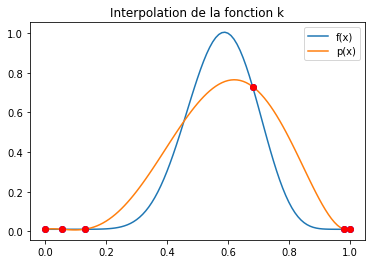

100
ftheta : [-2.11893091e-08  1.48387552e-09  4.37237591e-09 -8.13727974e-11
 -1.04563897e-08  2.19317076e-09 -1.40119208e-10 -6.29066244e-11]


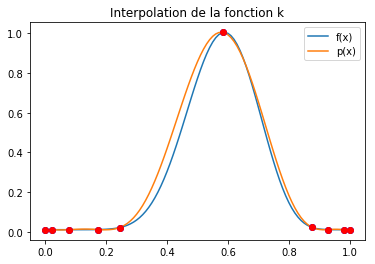

100
ftheta : [-7.04278707e-09  1.13236569e-08  2.47469892e-11 -2.97450953e-11
  1.25552901e-11 -2.39097742e-10 -4.74721956e-09  9.82172747e-10
 -1.59058381e-10  5.80588494e-11 -2.09924786e-12 -1.81923329e-09]


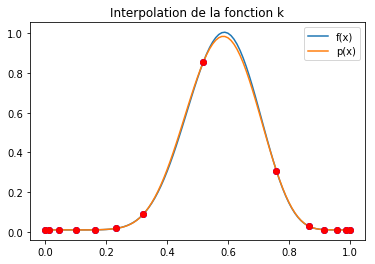

100
ftheta : [-6.95533173e-09  1.78089545e-08 -5.91993130e-09  2.09854703e-13
  0.00000000e+00 -5.55111512e-17  9.03888075e-13 -2.44836229e-09
 -1.99918277e-08  8.20013201e-09 -7.02761460e-12  3.24740235e-15
 -1.11022302e-15 -1.88876692e-14  1.92179607e-09 -3.11436847e-09]


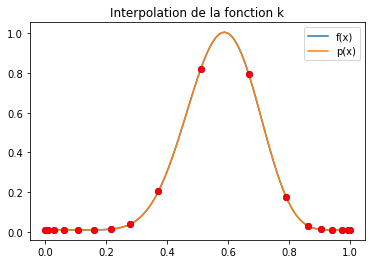

100
ftheta : [-2.66816097e-08  7.70308960e-08 -9.52781210e-08  7.02529659e-09
 -3.07913417e-14  7.49400542e-16  5.19029264e-15 -5.65936187e-14
  4.29822850e-09 -4.55056932e-08 -1.45861479e-07  1.10223429e-07
 -2.38423367e-08  4.98375473e-12 -7.74588726e-14  3.68594044e-14
 -2.71935252e-14 -5.59749840e-10  3.11410079e-08 -1.72036570e-08]


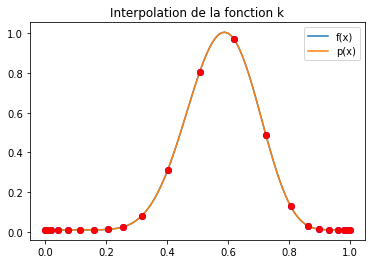

100
ftheta : [-3.61936729e-08  1.07844357e-07 -1.66716272e-07  1.15936630e-07
 -1.43530359e-09  4.06480405e-14 -9.74220704e-15 -7.91033905e-15
  4.56024107e-14 -1.87374311e-10  5.30836982e-08 -1.31691597e-07
 -2.85145762e-07  2.52636740e-07 -1.61784659e-07  1.07673888e-08
 -1.08635843e-12  1.86121951e-13 -1.00343345e-13  6.61276589e-14
  4.00937616e-12 -2.05845143e-08  6.66689379e-08 -2.77475390e-08]


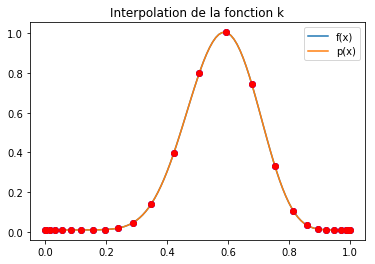

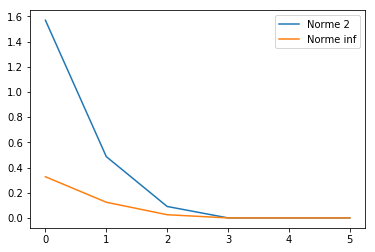

In [100]:
h = 1
epsilon=0.001
p = [2,4,6,8,10,12]
Err = np.zeros((2,len(p)))

for i in range(len(p)):
    px,fx = test_approx(p[i],k,h,epsilon)
    Err[0,i] = npl.norm(px-fx)
    Err[1,i] = npl.norm(px-fx,np.inf)
    
plt.plot(Err[0,:],label="Norme 2")
plt.plot(Err[1,:],label="Norme inf")
plt.legend()

### Variation de h

21
ftheta : [-1.30673250e-13  4.21662705e-13]


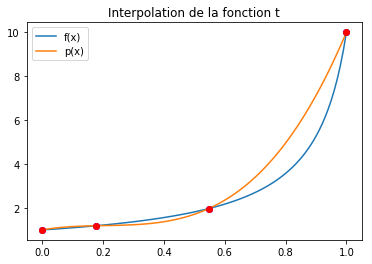

10
ftheta : [4.88498131e-14 5.65103520e-14]


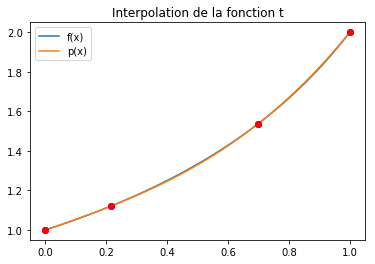

9
ftheta : [1.11022302e-15 3.33066907e-15]


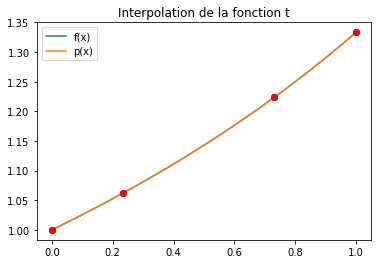

7
ftheta : [3.44169138e-15 1.23234756e-14]


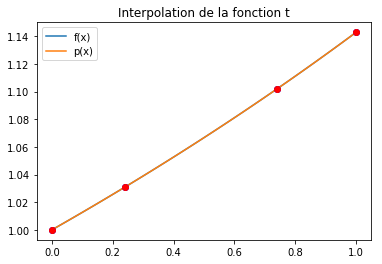

6
ftheta : [1.55431223e-15 5.99520433e-15]


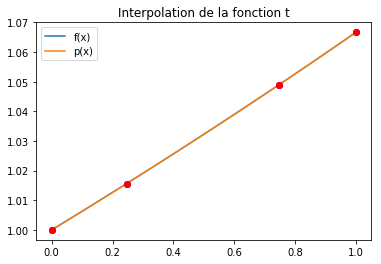

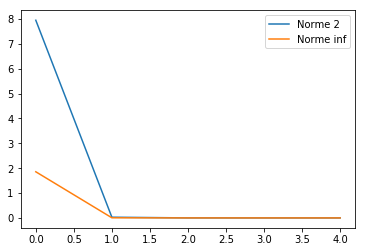

In [111]:
h = [1,1/2,1/4,1/8,1/16]
p = 1
epsilon=0.001
Err = np.zeros((2,len(h)))

for i in range(len(h)):
    px,fx = test_approx(p,t,h[i],epsilon)
    Err[0,i] = npl.norm(px-fx)
    Err[1,i] = npl.norm(px-fx,np.inf)
    
plt.plot(Err[0,:],label="Norme 2")
plt.plot(Err[1,:],label="Norme inf")
plt.legend()

### Fonction négative en partie

In [112]:
def q(x,h,l):
    x = x*h
    return 10 * (x-1/2)**4 + l

In [133]:
def Jp(p,f,h,arg,X,epsilon):
    i = np.linspace(0,p-1,p)
    theta_i = 2*(p-i)*np.pi/(2*p+1)
    D_alpha = 2*p*np.cos(p*theta_i)/(np.cos(theta_i)-1) + np.sin(p*theta_i)/np.sin(theta_i) * 2 * (p - 1/(np.cos(theta_i)-1))
    
    i = np.linspace(1,p,p)
    eta_i = (2*(p-i)+1)*np.pi/(2*p+1)
    D_beta = 2*p*np.cos(p*eta_i)/(np.cos(eta_i)+1) + np.sin(p*eta_i)/np.sin(eta_i) * 2* (p + 1/(np.cos(eta_i)+1))

    feps = max( np.max(f(X,h,arg)),epsilon)
    return  np.sqrt(feps) * sps.diags(np.concatenate((D_alpha,D_beta))).toarray()

def b_beta (p,f,h,arg,beta,x,epsilon):
    res = 0
    for i in range (p+1):
        somme = (-1)**(i+p)*np.sqrt(max(f(beta[i],h,arg),epsilon)/(1-beta[i])) 
        pro = 1
        for j in range (p+1):
            if i != j :
                pro *=  (x - beta[j])/(beta[i]-beta[j])
        somme *= pro
        res  += somme
    return res
  

def a_alpha (p,f,h,arg,alpha,x,epsilon):
    res = 0
    for i in range (p+1):
        somme = (-1)**(i+p)*np.sqrt(max(f(alpha[i],h,arg),epsilon)/(alpha[i])) 
        pro = 1
        for j in range (p+1):
            if i != j :
                pro *=  (x - alpha[j])/(alpha[i]-alpha[j])
        somme *= pro
        res += somme
    return res
     
def f_theta(X,p,f,h,arg,espilon):
    alpha = X[:p]
    alpha_1 = np.concatenate((alpha,[1]))
    beta = X[p:]
    beta_0 = np.concatenate(([0],beta))
    return np.concatenate(( b_beta(p,f,h,arg,beta_0,alpha,epsilon), a_alpha(p,f,h,arg,alpha_1,beta,epsilon) ))

In [134]:
def Newton_Raphson (p,f,h,arg,epsi,epsilon,eps=1e-12,itermax=100):
    X = init_X(p) 
    X = np.concatenate((X[:p],X[p+2:]))
    k=0
    err=2*eps
    while err > eps and itermax > k :
        X0 = np.copy(X)
        #print(f_theta(X,p,f,h,epsilon))
        d = npl.solve(Jp(p,f,h,arg,X,epsilon),f_theta(X,p,f,h,arg,epsilon))
        X = X - d
        #X = S(p,epsi,X)
        #print(f_theta(X,p,f,h,epsilon))
        k+=1
        err = npl.norm(X-X0)/npl.norm(X0)
    print(k)
    return X

In [138]:
def epsi_S(p):
    i = np.linspace(0,2*p+1,2*p+2)
    gamma = 1/2*(1-np.cos(i*np.pi/(2*p+1)))
    return min( 1/2/(p+1), np.min(gamma[1:]-gamma[:-1])/3)

def pn(x,ap,bp): 
    return x * ap**2 + (1-x) * bp**2
    
def approxh(x,p,f,h,arg,epsilon):
    epsi = epsi_S(p)
    #X = sco.fsolve(f_theta,np.array([1/4,3/4]), args=(p,f,h,epsilon))
    #X = S(p,epsi,X)
    X = Newton_Raphson(p,f,h,arg,epsi,epsilon)
    print("ftheta :",f_theta(X,p,f,h,arg,epsilon))
    X  = np.concatenate(( X[:p],[1],[0],X[p:]))

    ap = a_alpha(p,f,h,arg,X[:p+1],x,epsilon)
    bp = b_beta(p,f,h,arg,X[p+1:],x,epsilon)
    
    return pn(x,ap,bp),X

In [144]:
def test_approx(p,f,h,arg,espilon):
    x = np.linspace(0,1,101)
    px, interp = approxh(x,p,f,h,arg,epsilon)
   
    Ap = a_alpha(p,f,h,arg,interp[:p+1],interp,epsilon)
    Bp = b_beta(p,f,h,arg,interp[p+1:],interp,epsilon)
    
    fx = f(x,h,arg) 
    plt.plot(x,fx,label="f(x)")
    plt.plot(x,px,label="p(x)")
    plt.plot(interp,f(interp,h,arg),'ob')
    plt.plot(interp, pn(interp,Ap,Bp),'or')
    plt.legend()
    name = str(f).split(' ')
    plt.title("Interpolation de la fonction "+name[1])
    plt.show()
    
    return px,fx

28
ftheta : [-6.23112673e-15  2.17881269e-14  4.98678876e-12 -4.98701080e-12
 -2.18852714e-14  6.05071548e-15]


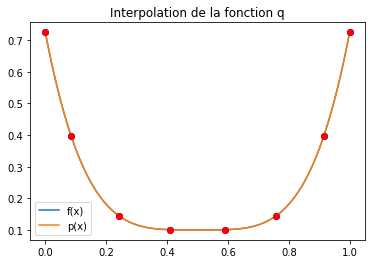

62
ftheta : [ 4.16333634e-17 -2.15105711e-16  4.62757610e-12 -4.62763855e-12
  3.19189120e-16  2.22044605e-16]


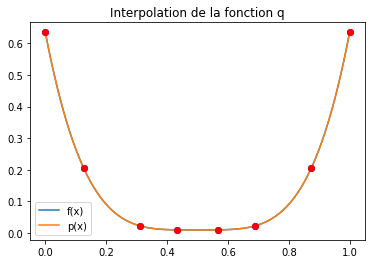

61
ftheta : [-9.58899626e-13  1.24454613e-12  2.35783615e-12 -2.35781533e-12
 -1.24456001e-12  9.58899626e-13]


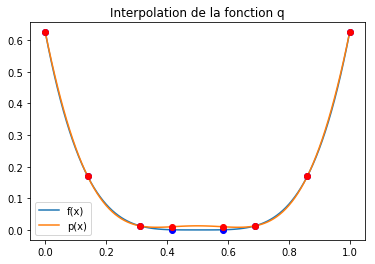

79
ftheta : [ 6.24986174e-13  2.12461299e-12  2.29830044e-12 -2.29831085e-12
 -2.12467544e-12 -6.24944541e-13]


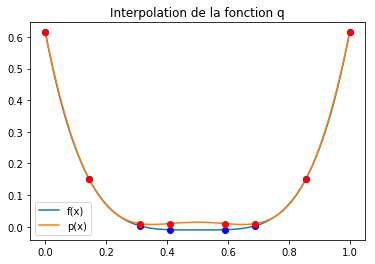

39
ftheta : [-2.68420702e-13  1.13964393e-13 -1.22499233e-12  1.22499233e-12
 -1.13950516e-13  2.68479683e-13]


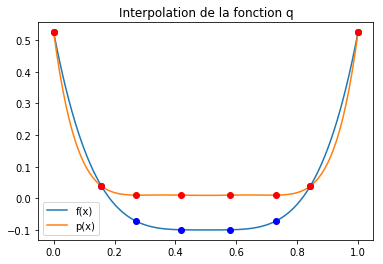

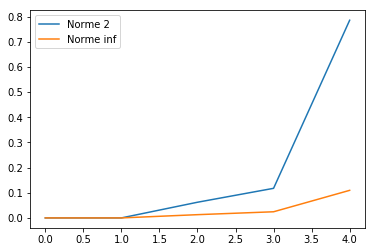

In [146]:
h = 1
p = 3
epsilon=0.01
l = [0.1,0.01,0,-0.01,-0.1]
Err = np.zeros((2,len(l)))

for i in range(len(l)):
    px,fx = test_approx(p,q,h,l[i],epsilon)
    Err[0,i] = npl.norm(px-fx)
    Err[1,i] = npl.norm(px-fx,np.inf)
    
plt.plot(Err[0,:],label="Norme 2")
plt.plot(Err[1,:],label="Norme inf")
plt.legend()